torch.Size([3, 256, 256])


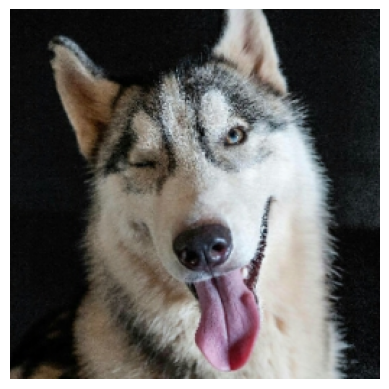

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

tranfgorm = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

#加载图像
img_path='Apple.jpg'
image=Image.open(img_path)

img_tensor=tranfgorm(image)
print(img_tensor.shape)

img_numpy=img_tensor.numpy()
#plt是(C,H,W)格式，需要转为(C,H,W)->(H,W,C) 才能显示
img_numpy=img_numpy.transpose((1,2,0))
plt.imshow(img_numpy)
plt.axis('off')
plt.show()

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # 编码器
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),  # (B, 16, 256, 256)
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),                     # (B, 16, 128, 128)
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),  # (B, 8, 128, 128)
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),                     # (B, 8, 14, 14)
        )
        # 解码器
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8,16,kernel_size=3,stride=2,padding=1,output_padding=1), # (B, 16, 28, 28)
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        print(x.shape)
        x = self.decoder(x)
        print(x.shape)
        return x
    
model=Autoencoder()


x=model.forward(torch.randn(1,3,256,256))

torch.Size([1, 8, 64, 64])
torch.Size([1, 3, 256, 256])


In [ ]:
device=torch.device('cuda'if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

num_epochs=400
for epoch in range(num_epochs):
    img=img_tensor.to(device)
    optimizer.zero_grad()
    output=model(img)
    loss=criterion(output,img)
    loss.backward()
    optimizer.step()

    if epoch%50==0:
        print(f'epoch [{epoch+1}/{num_epochs}], loss:{loss.item():.4f}')

torch.save(model.state_dict(),'conv_autoencoder.pth')

cuda
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
epoch [1/400], loss:0.1202
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64,

torch.Size([8, 64, 64])
torch.Size([3, 256, 256])


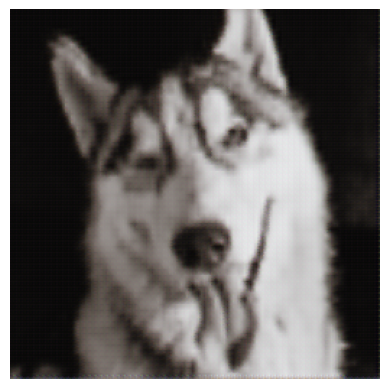

In [13]:
with torch.no_grad():
    data=img_tensor.to(device)
    recon=model(data)

import matplotlib.pyplot as plt
plt.imshow(recon.cpu().numpy().transpose((1,2,0)))

plt.axis('off')
plt.show()
